# Comprehensive Exploratory Data Analysis (EDA) - Health Risk Prediction

This notebook performs comprehensive exploratory data analysis for the diabetes risk prediction dataset following a structured checklist approach.

## 📋 **EDA Checklist Overview:**
1. **🧭 Dataset Overview** - Understanding data structure and basic properties
2. **🧹 Missing Values & Data Quality** - Detecting incomplete or incorrect data
3. **📏 Feature Types and Encoding Needs** - Categorizing variables by type
4. **📈 Univariate Analysis** - Individual variable distributions
5. **🔗 Bivariate & Multivariate Analysis** - Feature relationships
6. **🧮 Target Variable Analysis** - Deep dive into outcome variable
7. **🧠 Feature Importance** - Preliminary importance insights
8. **🌍 Domain Context Checks** - Contextual validation
9. **🧩 EDA Deliverables** - Summary reports and next steps

---
**Dataset:** `/data/raw/diabetes_dataset.csv`  
**Analysis Date:** December 15, 2025

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Statistical analysis
from scipy import stats
from scipy.stats import chi2_contingency, pearsonr, spearmanr
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set plotting styles
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

print("✅ Libraries imported successfully!")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🔢 NumPy version: {np.__version__}")
print(f"📈 Matplotlib version: {plt.matplotlib.__version__}")
print(f"🎨 Seaborn version: {sns.__version__}")

✅ Libraries imported successfully!
📊 Pandas version: 2.2.2
🔢 NumPy version: 2.0.2
📈 Matplotlib version: 3.10.0
🎨 Seaborn version: 0.13.2


## 🧭 1. Dataset Overview
**Goal:** Understand what your data looks like.

In [4]:
# Load the Dataset
print("📂 Loading diabetes dataset...")
df = pd.read_csv('../data/raw/diabetes_dataset.csv')

print("✅ Dataset loaded successfully!")
print(f"📏 Dataset Shape: {df.shape}")
print(f"📊 Rows: {df.shape[0]:,}")
print(f"🔢 Columns: {df.shape[1]:,}")
print(f"💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

📂 Loading diabetes dataset...
✅ Dataset loaded successfully!
📏 Dataset Shape: (100000, 31)
📊 Rows: 100,000
🔢 Columns: 31
💾 Memory Usage: 61.15 MB


In [5]:
# Dataset Overview - Data Types and Preview
print("📋 COLUMN DATA TYPES:")
print("=" * 50)
print(df.dtypes)
print("\n" + "=" * 50)

print("\n🔍 FIRST 5 ROWS:")
display(df.head())

print("\n🎲 RANDOM SAMPLE (5 rows):")
display(df.sample(5, random_state=42))

📋 COLUMN DATA TYPES:
age                                     int64
gender                                 object
ethnicity                              object
education_level                        object
income_level                           object
employment_status                      object
smoking_status                         object
alcohol_consumption_per_week            int64
physical_activity_minutes_per_week      int64
diet_score                            float64
sleep_hours_per_day                   float64
screen_time_hours_per_day             float64
family_history_diabetes                 int64
hypertension_history                    int64
cardiovascular_history                  int64
bmi                                   float64
waist_to_hip_ratio                    float64
systolic_bp                             int64
diastolic_bp                            int64
heart_rate                              int64
cholesterol_total                       int64
hdl_cholester

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,7.9,7.9,0,0,0,30.5,0.89,134,78,68,239,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,6.5,8.7,0,0,0,23.1,0.80,129,76,67,116,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,10.0,8.1,1,0,0,22.2,0.81,115,73,74,213,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,6.6,5.2,0,0,0,26.8,0.88,120,93,68,171,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,7.4,5.0,0,0,0,21.2,0.78,92,67,67,210,52,125,160,137,184,12.74,7.20,23.5,Type 2,1



🎲 RANDOM SAMPLE (5 rows):


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
75721,55,Female,White,Graduate,Lower-Middle,Unemployed,Current,1,55,6.4,8.6,5.9,0,0,0,23.7,0.82,107,77,54,232,54,160,125,85,105,3.31,5.41,29.2,No Diabetes,0
80184,82,Female,White,Graduate,Middle,Employed,Never,0,110,9.1,6.8,8.2,1,0,0,27.6,0.88,130,69,85,182,58,105,108,122,198,20.76,7.72,50.8,Type 2,1
19864,70,Male,Black,Postgraduate,Low,Retired,Never,1,92,7.4,8.6,3.1,0,0,0,23.8,0.86,111,85,75,191,72,78,98,105,120,12.42,6.11,29.5,Pre-Diabetes,0
76699,18,Male,White,Graduate,Upper-Middle,Student,Current,2,154,3.6,9.1,5.0,1,0,0,29.5,0.90,100,79,77,185,54,110,85,121,160,6.66,6.37,34.2,Pre-Diabetes,0
92991,55,Male,White,Graduate,Low,Employed,Current,3,5,7.5,7.8,2.7,0,1,0,26.6,0.85,121,74,79,189,46,103,56,85,112,3.82,5.35,31.2,Type 2,1


In [6]:
# Summary Statistics & Unique Values
print("📊 SUMMARY STATISTICS (ALL COLUMNS):")
print("=" * 60)
summary_stats = df.describe(include='all')
display(summary_stats)

print("\n🔢 UNIQUE VALUES PER COLUMN:")
print("=" * 40)
unique_counts = df.nunique().sort_values(ascending=False)
print(unique_counts)

# Create a summary table
column_info = pd.DataFrame({
    'Data_Type': df.dtypes,
    'Unique_Values': df.nunique(),
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
column_info['Sample_Value'] = [df[col].dropna().iloc[0] if not df[col].dropna().empty else 'N/A' for col in df.columns]

print("\n📋 COLUMN INFORMATION SUMMARY:")
print("=" * 50)
display(column_info)

📊 SUMMARY STATISTICS (ALL COLUMNS):


,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,family_history_diabetes,hypertension_history,cardiovascular_history,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
count,100000.00000,100000,100000,100000,100000,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000.000000
unique,NaN,3,5,4,5,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,Female,White,Highschool,Middle,Employed,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Type 2,NaN
freq,NaN,50216,44997,44891,35152,60175,59813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59774,NaN
mean,50.12041,NaN,NaN,NaN,NaN,NaN,NaN,2.003670,118.911640,5.994787,6.997818,5.996468,0.219410,0.250800,0.079200,25.612653,0.856078,115.799610,75.23249,69.632870,185.978110,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776,30.222362,NaN,0.599980
std,15.60460,NaN,NaN,NaN,NaN,NaN,NaN,1.417779,84.409662,1.780954,1.094622,2.468406,0.413849,0.433476,0.270052,3.586705,0.046837,14.284073,8.20425,8.371954,32.013005,10.267374,33.390256,43.372619,13.59561,30.935472,4.954060,0.813921,9.061505,NaN,0.489904
min,18.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,3.000000,0.500000,0.000000,0.000000,0.000000,15.000000,0.670000,90.000000,50.00000,40.000000,100.000000,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000,2.700000,NaN,0.000000
25%,39.00000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,57.000000,4.800000,6.300000,4.300000,0.000000,0.000000,0.000000,23.200000,0.820000,106.000000,70.00000,64.000000,164.000000,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000,23.800000,NaN,0.000000
50%,50.00000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,100.000000,6.000000,7.000000,6.000000,0.000000,0.000000,0.000000,25.600000,0.860000,116.000000,75.00000,70.000000,186.000000,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000,29.000000,NaN,1.000000
75%,61.00000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,160.000000,7.200000,7.700000,7.700000,0.000000,1.000000,0.000000,28.000000,0.890000,125.000000,81.00000,75.000000,208.000000,61.000000,126.000000,151.000000,120.00000,181.000000,12.450000,7.070000,35.600000,NaN,1.000000



🔢 UNIQUE VALUES PER COLUMN:
insulin_level                         2350
physical_activity_minutes_per_week     620
diabetes_risk_score                    569
hba1c                                  548
triglycerides                          262
bmi                                    240
glucose_postprandial                   210
cholesterol_total                      210
ldl_cholesterol                        190
screen_time_hours_per_day              156
glucose_fasting                        109
diet_score                             101
systolic_bp                             86
hdl_cholesterol                         79
age                                     73
sleep_hours_per_day                     71
heart_rate                              64
diastolic_bp                            60
waist_to_hip_ratio                      40
alcohol_consumption_per_week            11
income_level                             5
ethnicity                                5
diabetes_stage           

,Data_Type,Unique_Values,Missing_Count,Missing_Percentage,Sample_Value
age,int64,73,0,0.0,58
gender,object,3,0,0.0,Male
ethnicity,object,5,0,0.0,Asian
education_level,object,4,0,0.0,Highschool
income_level,object,5,0,0.0,Lower-Middle
employment_status,object,4,0,0.0,Employed
smoking_status,object,3,0,0.0,Never
alcohol_consumption_per_week,int64,11,0,0.0,0
physical_activity_minutes_per_week,int64,620,0,0.0,215
diet_score,float64,101,0,0.0,5.7


🎯 TARGET VARIABLE: diagnosed_diabetes
📊 Target Variable Distribution:


,Count,Percentage
diagnosed_diabetes,,
1,59998,60.0
0,40002,40.0


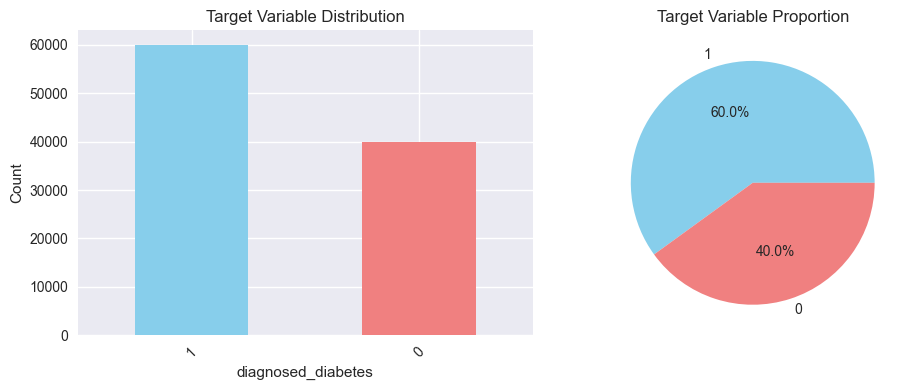

In [7]:
# Target Variable Initial Analysis
target_column = 'diagnosed_diabetes'  # Based on the dataset preview
print(f"🎯 TARGET VARIABLE: {target_column}")
print("=" * 50)

if target_column in df.columns:
    print("📊 Target Variable Distribution:")
    target_counts = df[target_column].value_counts()
    target_percentage = df[target_column].value_counts(normalize=True) * 100
    
    target_summary = pd.DataFrame({
        'Count': target_counts,
        'Percentage': target_percentage.round(2)
    })
    display(target_summary)
    
    # Quick visualization
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    df[target_column].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
    plt.title('Target Variable Distribution')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    df[target_column].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
    plt.title('Target Variable Proportion')
    plt.ylabel('')
    
    plt.tight_layout()
    plt.show()
else:
    print(f"⚠️ Target column '{target_column}' not found. Available columns:")
    print(df.columns.tolist())

## 🧹 2. Missing Values & Data Quality
**Goal:** Detect and plan to handle incomplete or incorrect data.

In [8]:
# Missing Values Analysis
print("🔍 MISSING VALUES ANALYSIS:")
print("=" * 50)

# Missing values count and percentage
missing_data = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_data) > 0:
    print("📊 Missing Values Summary:")
    display(missing_data)
    
    # Visualize missing values
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    missing_data['Missing_Count'].plot(kind='bar', color='lightcoral')
    plt.title('Missing Values by Column')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    missing_data['Missing_Percentage'].plot(kind='bar', color='lightblue')
    plt.title('Missing Values Percentage')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values found in the dataset!")
    
print(f"\n📏 Total missing values: {df.isnull().sum().sum()}")
print(f"📊 Dataset completeness: {((df.size - df.isnull().sum().sum()) / df.size * 100):.2f}%")

🔍 MISSING VALUES ANALYSIS:
✅ No missing values found in the dataset!

📏 Total missing values: 0
📊 Dataset completeness: 100.00%


In [9]:
# Duplicate Analysis
print("🔍 DUPLICATE ANALYSIS:")
print("=" * 40)

duplicate_count = df.duplicated().sum()
print(f"📊 Total duplicate rows: {duplicate_count}")
print(f"📈 Percentage of duplicates: {(duplicate_count / len(df) * 100):.2f}%")

if duplicate_count > 0:
    print("\n📋 Sample duplicate rows:")
    duplicates = df[df.duplicated(keep=False)].sort_values(df.columns.tolist())
    display(duplicates.head(10))
else:
    print("✅ No duplicate rows found!")

🔍 DUPLICATE ANALYSIS:
📊 Total duplicate rows: 0
📈 Percentage of duplicates: 0.00%
✅ No duplicate rows found!


In [10]:
# Outlier Detection (for numerical columns)
print("🔍 OUTLIER DETECTION:")
print("=" * 40)

numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"📊 Numerical columns for outlier analysis: {len(numerical_columns)}")

outlier_summary = {}

for col in numerical_columns[:10]:  # Analyze first 10 numerical columns
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    outlier_summary[col] = {
        'Count': outlier_count,
        'Percentage': round(outlier_percentage, 2),
        'Lower_Bound': round(lower_bound, 2),
        'Upper_Bound': round(upper_bound, 2)
    }

outlier_df = pd.DataFrame(outlier_summary).T
outlier_df = outlier_df[outlier_df['Count'] > 0].sort_values('Count', ascending=False)

if len(outlier_df) > 0:
    print("\n📋 Outlier Summary (IQR Method):")
    display(outlier_df)
else:
    print("✅ No significant outliers detected using IQR method!")

🔍 OUTLIER DETECTION:
📊 Numerical columns for outlier analysis: 24

📋 Outlier Summary (IQR Method):


,Count,Percentage,Lower_Bound,Upper_Bound
family_history_diabetes,21941.0,21.94,0.0,0.0
cardiovascular_history,7920.0,7.92,0.0,0.0
physical_activity_minutes_per_week,3199.0,3.20,-97.5,314.5
sleep_hours_per_day,900.0,0.90,4.2,9.8
bmi,744.0,0.74,16.0,35.2
alcohol_consumption_per_week,458.0,0.46,-2.0,6.0
diet_score,337.0,0.34,1.2,10.8
screen_time_hours_per_day,305.0,0.30,-0.8,12.8


## 📏 3. Feature Types and Encoding Needs
**Goal:** Separate variables by type to plan encoding.

In [11]:
# Feature Type Classification
print("📊 FEATURE TYPE CLASSIFICATION:")
print("=" * 50)

# Separate by data types
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
datetime_features = df.select_dtypes(include=['datetime64']).columns.tolist()

# Further classify numerical features
continuous_features = []
discrete_features = []

for col in numerical_features:
    unique_values = df[col].nunique()
    if unique_values <= 20:  # Heuristic: <= 20 unique values might be discrete
        discrete_features.append(col)
    else:
        continuous_features.append(col)

print(f"🔢 Numerical Features ({len(numerical_features)}):")
print(f"   └── Continuous ({len(continuous_features)}): {continuous_features[:10]}{'...' if len(continuous_features) > 10 else ''}")
print(f"   └── Discrete ({len(discrete_features)}): {discrete_features[:10]}{'...' if len(discrete_features) > 10 else ''}")

print(f"\n🏷️ Categorical Features ({len(categorical_features)}):")
for i, cat in enumerate(categorical_features[:15]):  # Show first 15
    unique_count = df[cat].nunique()
    print(f"   {i+1:2d}. {cat:<25} ({unique_count} unique values)")
if len(categorical_features) > 15:
    print(f"   ... and {len(categorical_features) - 15} more")

print(f"\n📅 DateTime Features ({len(datetime_features)}): {datetime_features}")

# Create feature classification summary
feature_classification = {
    'Continuous_Numerical': continuous_features,
    'Discrete_Numerical': discrete_features,
    'Categorical': categorical_features,
    'DateTime': datetime_features
}

print(f"\n📋 FEATURE CLASSIFICATION SUMMARY:")
print("-" * 40)
for feat_type, features in feature_classification.items():
    print(f"{feat_type}: {len(features)} features")

📊 FEATURE TYPE CLASSIFICATION:
🔢 Numerical Features (24):
   └── Continuous (19): ['age', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate']...
   └── Discrete (5): ['alcohol_consumption_per_week', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'diagnosed_diabetes']

🏷️ Categorical Features (7):
    1. gender                    (3 unique values)
    2. ethnicity                 (5 unique values)
    3. education_level           (4 unique values)
    4. income_level              (5 unique values)
    5. employment_status         (4 unique values)
    6. smoking_status            (3 unique values)
    7. diabetes_stage            (5 unique values)

📅 DateTime Features (0): []

📋 FEATURE CLASSIFICATION SUMMARY:
----------------------------------------
Continuous_Numerical: 19 features
Discrete_Numerical: 5 features
Categorical: 7 feat

In [12]:
# Detailed Categorical Analysis
print("🔍 DETAILED CATEGORICAL ANALYSIS:")
print("=" * 50)

for col in categorical_features[:8]:  # Analyze first 8 categorical columns
    print(f"\n📊 {col.upper()}:")
    print("-" * 30)
    
    value_counts = df[col].value_counts()
    print(f"Unique values: {len(value_counts)}")
    print("Top values:")
    
    for idx, (value, count) in enumerate(value_counts.head(5).items()):
        percentage = (count / len(df)) * 100
        print(f"  {idx+1}. {value}: {count:,} ({percentage:.1f}%)")
    
    if len(value_counts) > 5:
        print(f"  ... and {len(value_counts) - 5} more values")
        
# Check for potential inconsistencies in categorical data
print(f"\n🔍 POTENTIAL DATA INCONSISTENCIES:")
print("-" * 40)

inconsistency_found = False
for col in categorical_features:
    values = df[col].astype(str).str.lower().value_counts()
    original_values = df[col].value_counts()
    
    if len(values) != len(original_values):
        inconsistency_found = True
        print(f"⚠️ {col}: Potential case inconsistencies detected")
        print(f"   Original unique values: {len(original_values)}")
        print(f"   Lowercase unique values: {len(values)}")

if not inconsistency_found:
    print("✅ No obvious case inconsistencies detected!")

🔍 DETAILED CATEGORICAL ANALYSIS:

📊 GENDER:
------------------------------
Unique values: 3
Top values:
  1. Female: 50,216 (50.2%)
  2. Male: 47,771 (47.8%)
  3. Other: 2,013 (2.0%)

📊 ETHNICITY:
------------------------------
Unique values: 5
Top values:
  1. White: 44,997 (45.0%)
  2. Hispanic: 20,103 (20.1%)
  3. Black: 17,986 (18.0%)
  4. Asian: 11,865 (11.9%)
  5. Other: 5,049 (5.0%)

📊 EDUCATION_LEVEL:
------------------------------
Unique values: 4
Top values:
  1. Highschool: 44,891 (44.9%)
  2. Graduate: 35,037 (35.0%)
  3. Postgraduate: 14,972 (15.0%)
  4. No formal: 5,100 (5.1%)

📊 INCOME_LEVEL:
------------------------------
Unique values: 5
Top values:
  1. Middle: 35,152 (35.2%)
  2. Lower-Middle: 25,150 (25.1%)
  3. Upper-Middle: 19,866 (19.9%)
  4. Low: 14,830 (14.8%)
  5. High: 5,002 (5.0%)

📊 EMPLOYMENT_STATUS:
------------------------------
Unique values: 4
Top values:
  1. Employed: 60,175 (60.2%)
  2. Retired: 21,761 (21.8%)
  3. Unemployed: 11,918 (11.9%)
  4. St

## 📈 4. Univariate Analysis
**Goal:** Study each variable's distribution.

📊 NUMERICAL FEATURES DISTRIBUTION ANALYSIS:
📋 Distribution Statistics:


,Mean,Median,Std,Skewness,Kurtosis,Min,Max
age,50.120,50.00,15.605,0.083,-0.388,18.00,90.00
alcohol_consumption_per_week,2.004,2.00,1.418,0.703,0.452,0.00,10.00
physical_activity_minutes_per_week,118.912,100.00,84.410,1.390,2.812,0.00,833.00
diet_score,5.995,6.00,1.781,-0.070,-0.220,0.00,10.00
sleep_hours_per_day,6.998,7.00,1.095,-0.013,-0.112,3.00,10.00
screen_time_hours_per_day,5.996,6.00,2.468,0.083,-0.177,0.50,16.80
family_history_diabetes,0.219,0.00,0.414,1.356,-0.161,0.00,1.00
hypertension_history,0.251,0.00,0.433,1.150,-0.678,0.00,1.00
cardiovascular_history,0.079,0.00,0.270,3.116,7.713,0.00,1.00
bmi,25.613,25.60,3.587,0.006,-0.057,15.00,39.20


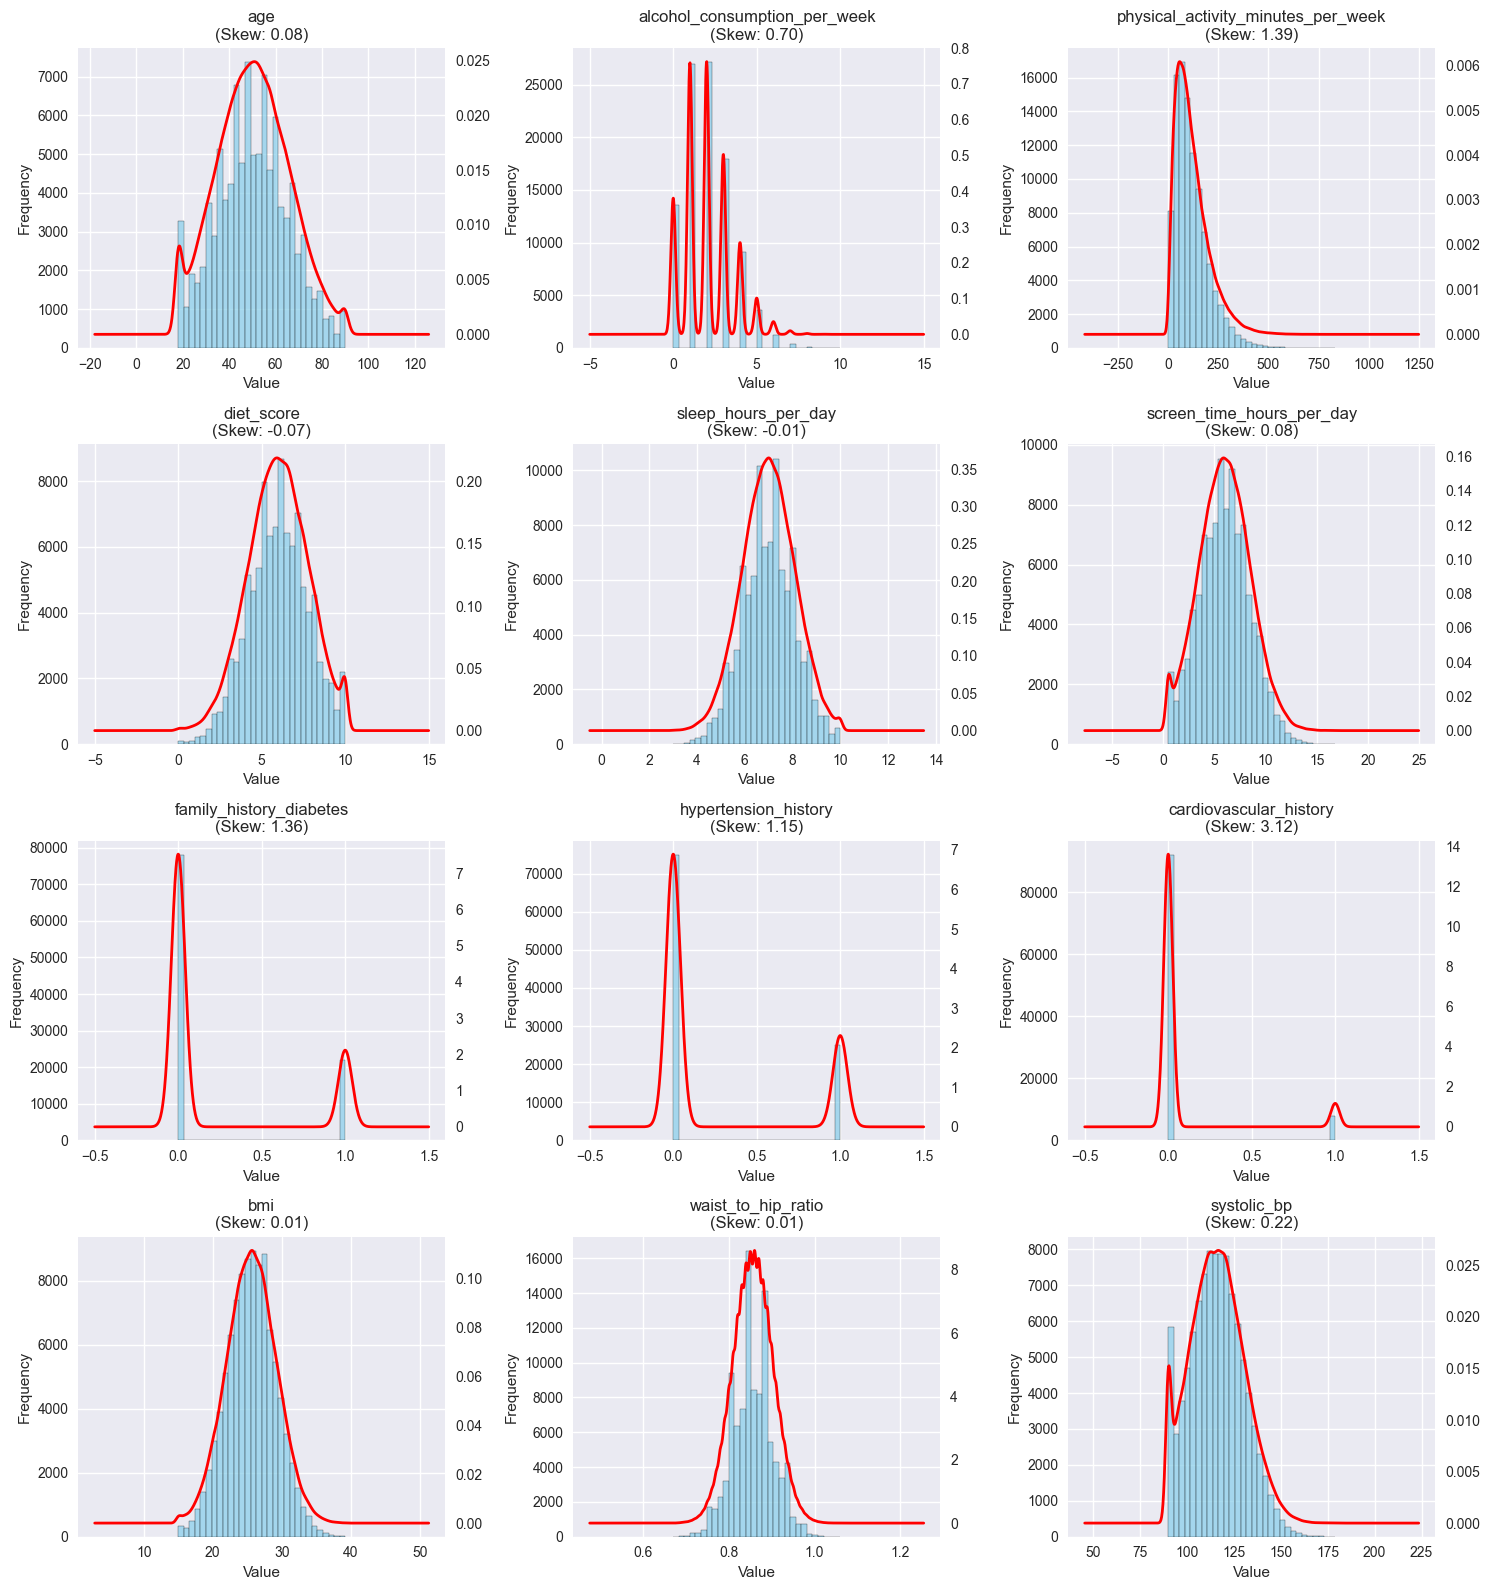

In [13]:
# Numerical Features Distribution Analysis
print("📊 NUMERICAL FEATURES DISTRIBUTION ANALYSIS:")
print("=" * 60)

# Select key numerical features for analysis (first 12)
key_numerical = numerical_features[:12]

# Calculate distribution statistics
distribution_stats = {}
for col in key_numerical:
    stats_dict = {
        'Mean': df[col].mean(),
        'Median': df[col].median(),
        'Std': df[col].std(),
        'Skewness': df[col].skew(),
        'Kurtosis': df[col].kurtosis(),
        'Min': df[col].min(),
        'Max': df[col].max()
    }
    distribution_stats[col] = stats_dict

dist_df = pd.DataFrame(distribution_stats).T
print("📋 Distribution Statistics:")
display(dist_df.round(3))

# Visualize distributions
n_cols = 3
n_rows = (len(key_numerical) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes]

for i, col in enumerate(key_numerical):
    ax = axes[i] if len(key_numerical) > 1 else axes
    
    # Create histogram with KDE
    df[col].hist(bins=30, alpha=0.7, ax=ax, color='skyblue', edgecolor='black')
    
    # Add KDE line
    try:
        df[col].plot.kde(ax=ax, color='red', linewidth=2, secondary_y=True)
    except:
        pass
    
    ax.set_title(f'{col}\n(Skew: {df[col].skew():.2f})')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Hide empty subplots
for i in range(len(key_numerical), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

🏷️ CATEGORICAL FEATURES DISTRIBUTION ANALYSIS:


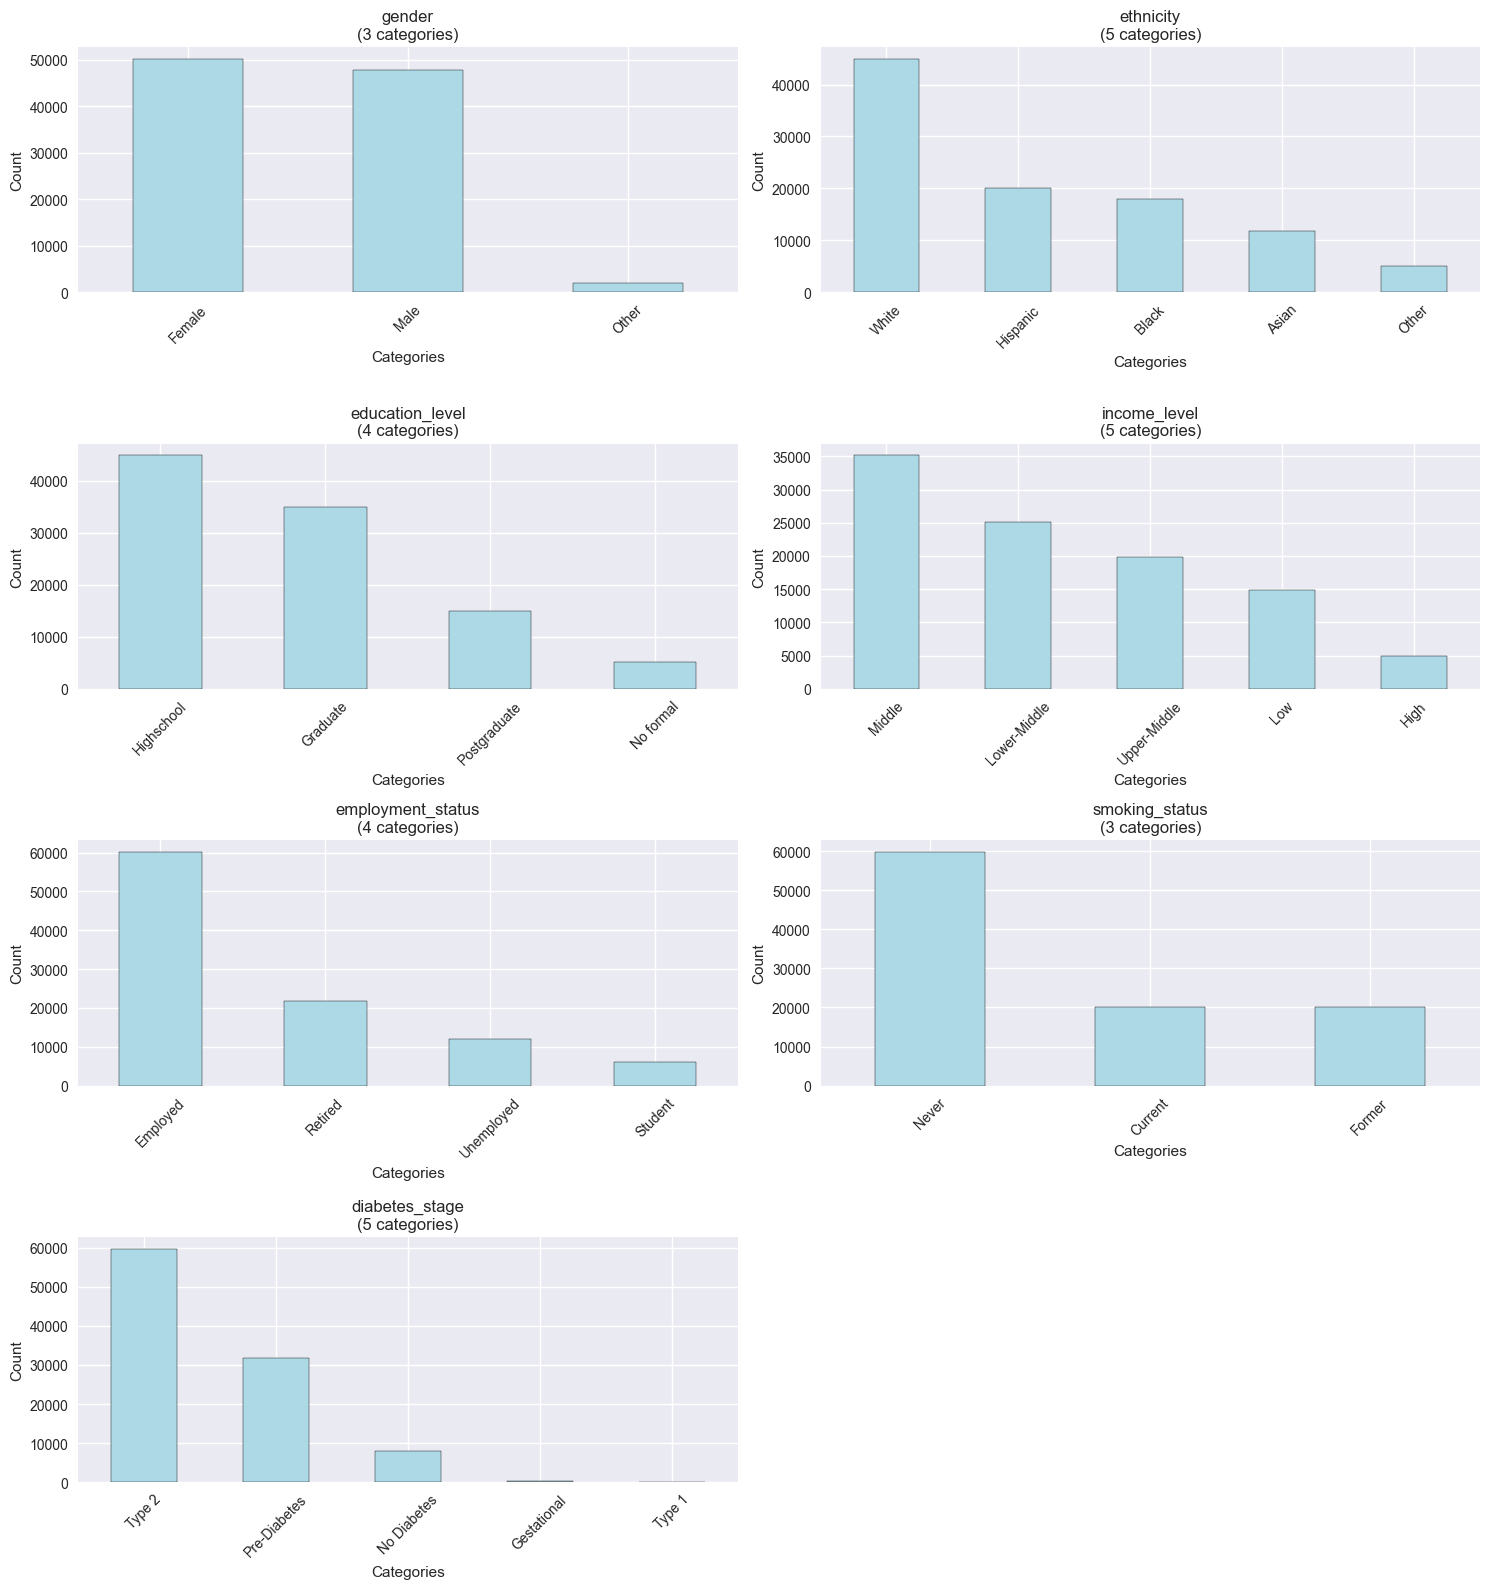


📋 Categorical Features Summary:
----------------------------------------

gender:
  - Unique categories: 3
  - Most frequent: 'Female' (50,216, 50.2%)
  - Least frequent: 'Other' (2,013)

ethnicity:
  - Unique categories: 5
  - Most frequent: 'White' (44,997, 45.0%)
  - Least frequent: 'Other' (5,049)

education_level:
  - Unique categories: 4
  - Most frequent: 'Highschool' (44,891, 44.9%)
  - Least frequent: 'No formal' (5,100)

income_level:
  - Unique categories: 5
  - Most frequent: 'Middle' (35,152, 35.2%)
  - Least frequent: 'High' (5,002)

employment_status:
  - Unique categories: 4
  - Most frequent: 'Employed' (60,175, 60.2%)
  - Least frequent: 'Student' (6,146)

smoking_status:
  - Unique categories: 3
  - Most frequent: 'Never' (59,813, 59.8%)
  - Least frequent: 'Former' (20,011)

diabetes_stage:
  - Unique categories: 5
  - Most frequent: 'Type 2' (59,774, 59.8%)
  - Least frequent: 'Type 1' (122)


In [14]:
# Categorical Features Distribution Analysis
print("🏷️ CATEGORICAL FEATURES DISTRIBUTION ANALYSIS:")
print("=" * 60)

# Analyze key categorical features
key_categorical = categorical_features[:8]  # First 8 categorical features

# Create visualizations for categorical features
n_cols = 2
n_rows = (len(key_categorical) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 else []

for i, col in enumerate(key_categorical):
    if i < len(axes):
        ax = axes[i]
        
        # Get value counts
        value_counts = df[col].value_counts()
        
        # Create bar plot
        if len(value_counts) <= 10:  # If not too many categories
            value_counts.plot(kind='bar', ax=ax, color='lightblue', edgecolor='black')
            ax.set_title(f'{col}\n({len(value_counts)} categories)')
            ax.set_xlabel('Categories')
            ax.set_ylabel('Count')
            ax.tick_params(axis='x', rotation=45)
        else:
            # For many categories, show top 10
            top_10 = value_counts.head(10)
            top_10.plot(kind='bar', ax=ax, color='lightblue', edgecolor='black')
            ax.set_title(f'{col} (Top 10)\n({len(value_counts)} total categories)')
            ax.set_xlabel('Categories')
            ax.set_ylabel('Count')
            ax.tick_params(axis='x', rotation=45)

# Hide empty subplots
for i in range(len(key_categorical), len(axes)):
    if i < len(axes):
        axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Print detailed categorical statistics
print("\n📋 Categorical Features Summary:")
print("-" * 40)
for col in key_categorical:
    unique_count = df[col].nunique()
    most_frequent = df[col].mode().iloc[0] if len(df[col].mode()) > 0 else 'N/A'
    most_frequent_count = df[col].value_counts().iloc[0]
    most_frequent_pct = (most_frequent_count / len(df)) * 100
    
    print(f"\n{col}:")
    print(f"  - Unique categories: {unique_count}")
    print(f"  - Most frequent: '{most_frequent}' ({most_frequent_count:,}, {most_frequent_pct:.1f}%)")
    print(f"  - Least frequent: '{df[col].value_counts().index[-1]}' ({df[col].value_counts().iloc[-1]:,})")

## 🔗 5. Bivariate & Multivariate Analysis
**Goal:** Understand relationships between features and target.

🔗 CORRELATION ANALYSIS:


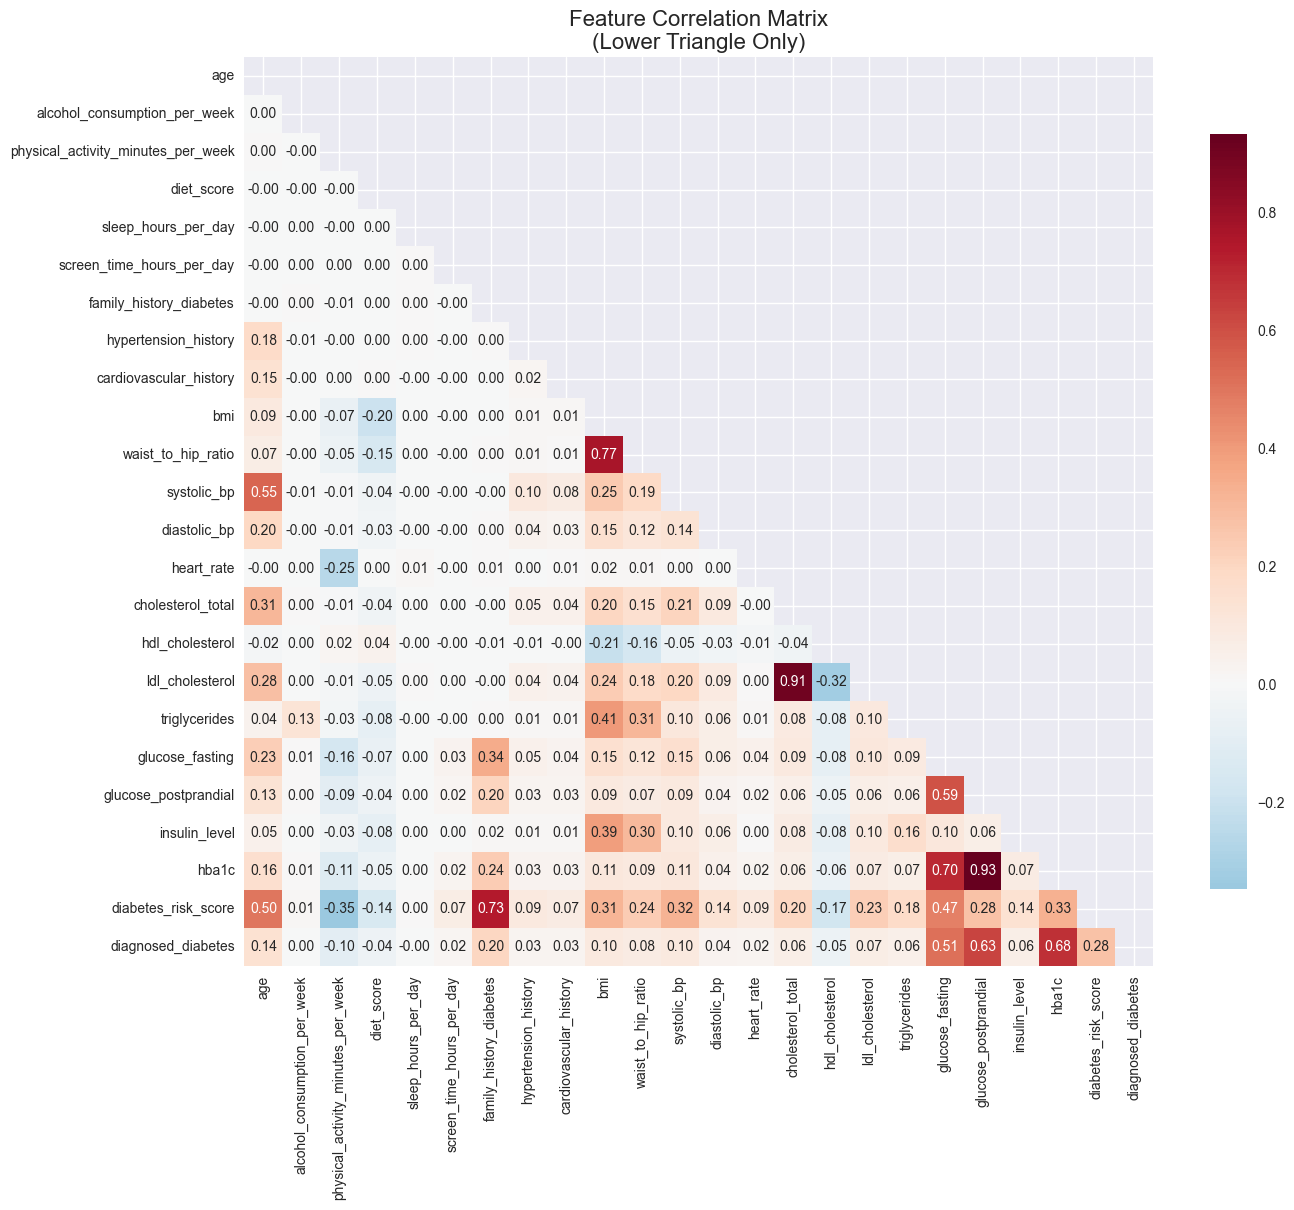


📊 HIGH CORRELATIONS (|r| > 0.7):
-----------------------------------


,Feature_1,Feature_2,Correlation
4,glucose_postprandial,hba1c,0.933145
2,cholesterol_total,ldl_cholesterol,0.906132
1,bmi,waist_to_hip_ratio,0.765744
0,family_history_diabetes,diabetes_risk_score,0.733085
3,glucose_fasting,hba1c,0.700352


In [15]:
# Correlation Analysis
print("🔗 CORRELATION ANALYSIS:")
print("=" * 40)

# Calculate correlation matrix for numerical features
numerical_df = df[numerical_features]
correlation_matrix = numerical_df.corr()

# Create correlation heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix, 
           annot=True, 
           cmap='RdBu_r', 
           center=0,
           square=True,
           mask=mask,
           fmt='.2f',
           cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix\n(Lower Triangle Only)', fontsize=16)
plt.tight_layout()
plt.show()

# Find high correlations
print("\n📊 HIGH CORRELATIONS (|r| > 0.7):")
print("-" * 35)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            high_corr_pairs.append({
                'Feature_1': correlation_matrix.columns[i],
                'Feature_2': correlation_matrix.columns[j], 
                'Correlation': corr_value
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', key=abs, ascending=False)
    display(high_corr_df)
else:
    print("✅ No correlations > 0.7 found between numerical features")

## 🧮 6. Target Variable Analysis
**Goal:** Explore the output variable directly.

🎯 TARGET VARIABLE DEEP ANALYSIS:
📊 Target Variable: diagnosed_diabetes
------------------------------


,Count,Proportion,Percentage
diagnosed_diabetes,,,
1,59998,0.59998,59.998
0,40002,0.40002,40.002



⚖️ Class Balance Analysis:
   Imbalance Ratio: 1.50
   ✅ Dataset appears reasonably balanced


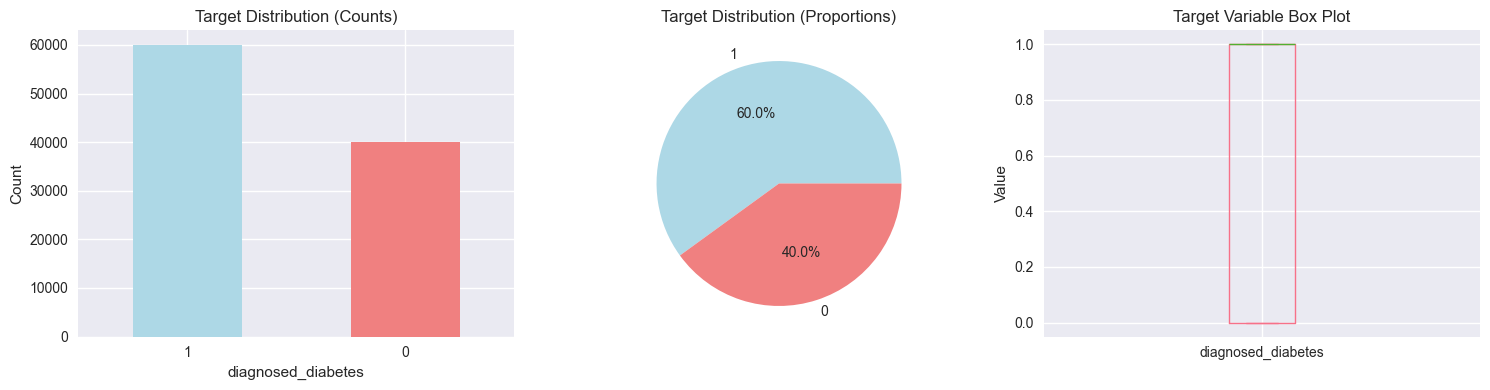

In [16]:
# Target Variable Deep Analysis
print("🎯 TARGET VARIABLE DEEP ANALYSIS:")
print("=" * 50)

# Assume 'diagnosed_diabetes' is our target - update based on actual column
target_col = 'diagnosed_diabetes'

if target_col in df.columns:
    print(f"📊 Target Variable: {target_col}")
    print("-" * 30)
    
    # Target distribution
    target_dist = df[target_col].value_counts()
    target_prop = df[target_col].value_counts(normalize=True)
    
    target_summary = pd.DataFrame({
        'Count': target_dist,
        'Proportion': target_prop,
        'Percentage': target_prop * 100
    })
    
    display(target_summary)
    
    # Check for class imbalance
    imbalance_ratio = target_dist.max() / target_dist.min()
    print(f"\n⚖️ Class Balance Analysis:")
    print(f"   Imbalance Ratio: {imbalance_ratio:.2f}")
    if imbalance_ratio > 3:
        print("   ⚠️ Dataset shows class imbalance (ratio > 3)")
    else:
        print("   ✅ Dataset appears reasonably balanced")
        
    # Visualize target distribution
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    # Count plot
    target_dist.plot(kind='bar', ax=axes[0], color=['lightblue', 'lightcoral'])
    axes[0].set_title('Target Distribution (Counts)')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=0)
    
    # Pie chart
    axes[1].pie(target_dist.values, labels=target_dist.index, autopct='%1.1f%%', 
               colors=['lightblue', 'lightcoral'])
    axes[1].set_title('Target Distribution (Proportions)')
    
    # Box plot (if target is numerical)
    if df[target_col].dtype in ['int64', 'float64']:
        df[target_col].plot(kind='box', ax=axes[2])
        axes[2].set_title('Target Variable Box Plot')
        axes[2].set_ylabel('Value')
    else:
        axes[2].text(0.5, 0.5, 'Target is Categorical', ha='center', va='center', 
                    transform=axes[2].transAxes, fontsize=14)
        axes[2].set_title('Target Type: Categorical')
        axes[2].set_xticks([])
        axes[2].set_yticks([])
    
    plt.tight_layout()
    plt.show()
    
else:
    print(f"❌ Target column '{target_col}' not found!")
    print("Available columns:")
    for i, col in enumerate(df.columns, 1):
        print(f"  {i:2d}. {col}")
    
    # Let's find potential target columns
    potential_targets = [col for col in df.columns if any(keyword in col.lower() 
                        for keyword in ['diabetes', 'target', 'label', 'class', 'outcome'])]
    if potential_targets:
        print(f"\n🔍 Potential target columns: {potential_targets}")
    else:
        print("\n🔍 No obvious target columns found. Please specify the target variable.")

## 🧠 7. Feature Importance (Preliminary Insight)
**Goal:** Get an early signal on which features may matter.

🧠 PRELIMINARY FEATURE IMPORTANCE ANALYSIS:
📊 Features for analysis: 30
🎯 Target samples: 100000

📈 CORRELATION WITH TARGET (Numerical Features):
--------------------------------------------------
Top 10 correlations with target:


,Feature,Correlation,Abs_Correlation
0,hba1c,0.679397,0.679397
1,glucose_postprandial,0.629832,0.629832
2,glucose_fasting,0.510919,0.510919
3,diabetes_risk_score,0.277300,0.277300
4,family_history_diabetes,0.197926,0.197926
5,age,0.137713,0.137713
6,physical_activity_minutes_per_week,-0.100774,0.100774
7,bmi,0.097057,0.097057
8,systolic_bp,0.095481,0.095481
9,waist_to_hip_ratio,0.078918,0.078918



🧮 MUTUAL INFORMATION SCORES:
----------------------------------------
Top 15 features by Mutual Information:


,Feature,MI_Score
29,diabetes_stage,0.679776
27,hba1c,0.441866
25,glucose_postprandial,0.288519
24,glucose_fasting,0.165628
28,diabetes_risk_score,0.038098
12,family_history_diabetes,0.023137
0,age,0.010186
8,physical_activity_minutes_per_week,0.008115
6,smoking_status,0.007784
15,bmi,0.005510


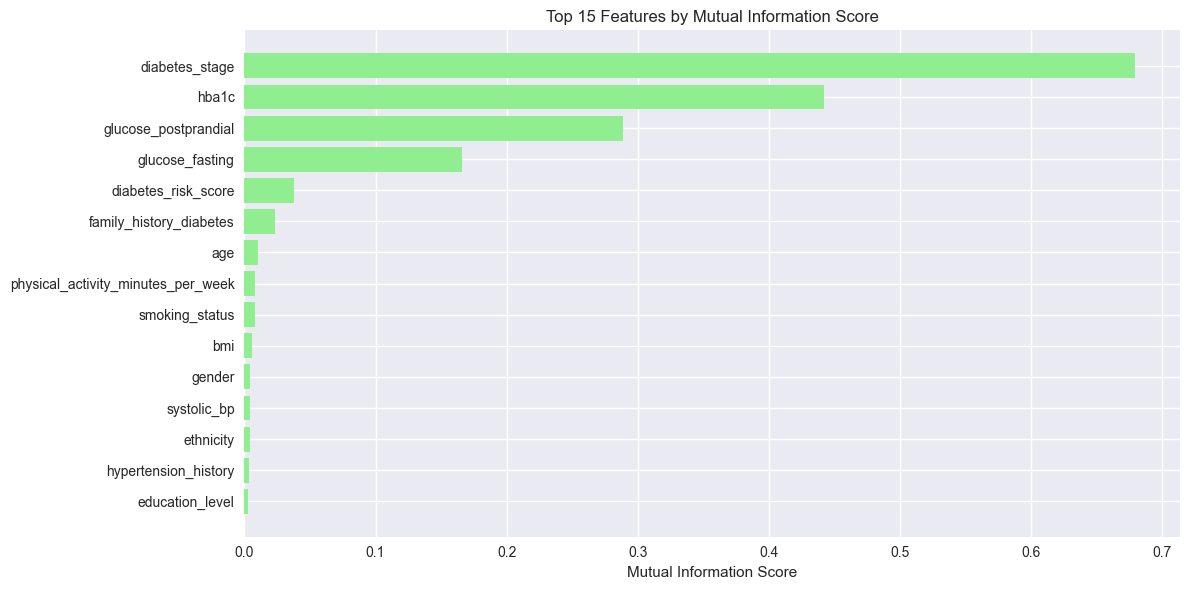


🌲 RANDOM FOREST FEATURE IMPORTANCE:
---------------------------------------------
Top 15 features by Random Forest importance:


,Feature,Importance
29,diabetes_stage,0.566968
27,hba1c,0.249825
25,glucose_postprandial,0.099986
24,glucose_fasting,0.049974
28,diabetes_risk_score,0.010321
12,family_history_diabetes,0.003892
0,age,0.002837
8,physical_activity_minutes_per_week,0.001743
15,bmi,0.001417
17,systolic_bp,0.001255


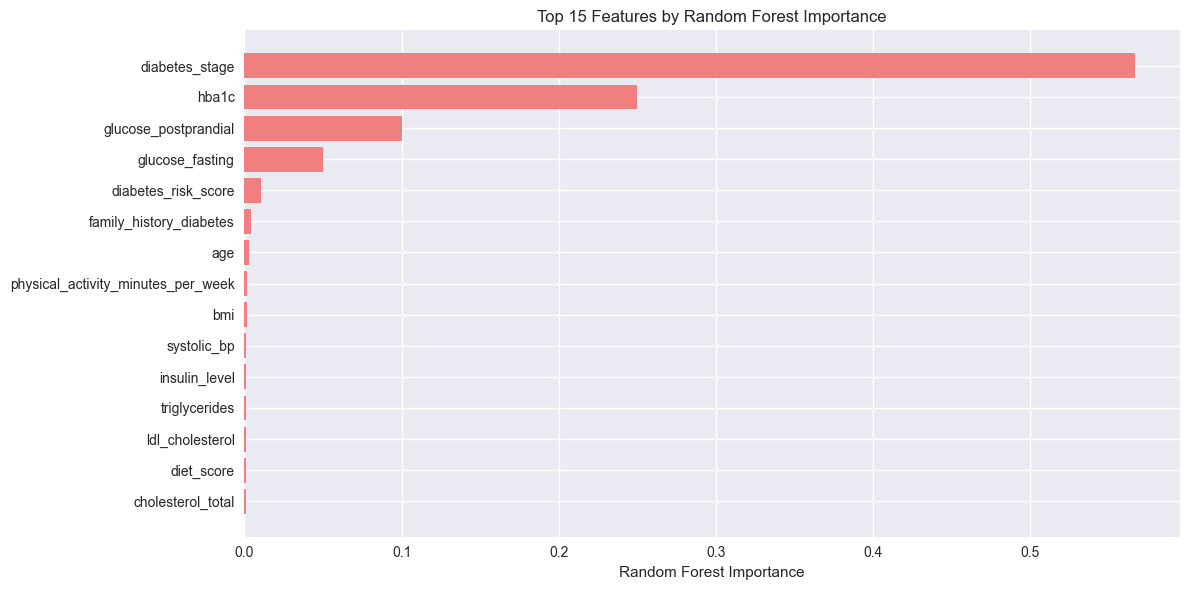

In [17]:
# Preliminary Feature Importance Analysis
print("🧠 PRELIMINARY FEATURE IMPORTANCE ANALYSIS:")
print("=" * 60)

# We'll analyze this once we identify the correct target variable
target_col = 'diagnosed_diabetes'  # Update based on actual target

if target_col in df.columns:
    # Prepare data for feature importance
    # Encode categorical variables for analysis
    df_encoded = df.copy()
    
    # Label encode categorical columns
    label_encoders = {}
    for col in categorical_features:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        label_encoders[col] = le
    
    # Separate features and target
    X = df_encoded.drop(columns=[target_col])
    
    # Handle target encoding if needed
    if df[target_col].dtype == 'object':
        le_target = LabelEncoder()
        y = le_target.fit_transform(df[target_col])
        target_classes = le_target.classes_
        print(f"🎯 Target classes: {target_classes}")
    else:
        y = df[target_col]
    
    print(f"📊 Features for analysis: {X.shape[1]}")
    print(f"🎯 Target samples: {len(y)}")
    
    # 1. Correlation with target (for numerical features)
    print("\n📈 CORRELATION WITH TARGET (Numerical Features):")
    print("-" * 50)
    
    target_correlations = {}
    for col in numerical_features:
        if col != target_col and col in X.columns:
            corr = np.corrcoef(X[col], y)[0, 1]
            target_correlations[col] = corr
    
    # Sort by absolute correlation
    sorted_corr = dict(sorted(target_correlations.items(), key=lambda x: abs(x[1]), reverse=True))
    
    corr_df = pd.DataFrame(list(sorted_corr.items()), columns=['Feature', 'Correlation'])
    corr_df['Abs_Correlation'] = np.abs(corr_df['Correlation'])
    
    print("Top 10 correlations with target:")
    display(corr_df.head(10))
    
    # 2. Mutual Information Scores
    print("\n🧮 MUTUAL INFORMATION SCORES:")
    print("-" * 40)
    
    try:
        # Calculate mutual information
        mi_scores = mutual_info_classif(X, y, random_state=42)
        mi_df = pd.DataFrame({
            'Feature': X.columns,
            'MI_Score': mi_scores
        }).sort_values('MI_Score', ascending=False)
        
        print("Top 15 features by Mutual Information:")
        display(mi_df.head(15))
        
        # Visualize top MI scores
        plt.figure(figsize=(12, 6))
        top_mi = mi_df.head(15)
        plt.barh(range(len(top_mi)), top_mi['MI_Score'], color='lightgreen')
        plt.yticks(range(len(top_mi)), top_mi['Feature'])
        plt.xlabel('Mutual Information Score')
        plt.title('Top 15 Features by Mutual Information Score')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"❌ Error calculating mutual information: {e}")
    
    # 3. Quick Random Forest Feature Importance
    print("\n🌲 RANDOM FOREST FEATURE IMPORTANCE:")
    print("-" * 45)
    
    try:
        # Quick Random Forest model
        rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
        rf.fit(X, y)
        
        # Get feature importances
        rf_importance = pd.DataFrame({
            'Feature': X.columns,
            'Importance': rf.feature_importances_
        }).sort_values('Importance', ascending=False)
        
        print("Top 15 features by Random Forest importance:")
        display(rf_importance.head(15))
        
        # Visualize RF importance
        plt.figure(figsize=(12, 6))
        top_rf = rf_importance.head(15)
        plt.barh(range(len(top_rf)), top_rf['Importance'], color='lightcoral')
        plt.yticks(range(len(top_rf)), top_rf['Feature'])
        plt.xlabel('Random Forest Importance')
        plt.title('Top 15 Features by Random Forest Importance')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"❌ Error with Random Forest analysis: {e}")
        
else:
    print(f"❌ Cannot perform feature importance analysis. Target column '{target_col}' not found.")
    print("Please update the target_col variable with the correct target column name.")

## 🧩 9. EDA Deliverables & Next Steps
**Goal:** Produce clean summaries for later reporting.

In [18]:
# EDA Summary & Deliverables
print("📋 EDA SUMMARY & DELIVERABLES:")
print("=" * 50)

# Create comprehensive EDA summary
eda_summary = {
    'Dataset Overview': {
        'Total Rows': f"{df.shape[0]:,}",
        'Total Columns': df.shape[1],
        'Memory Usage (MB)': f"{df.memory_usage(deep=True).sum() / 1024**2:.2f}",
        'Duplicate Rows': df.duplicated().sum(),
        'Dataset Completeness (%)': f"{((df.size - df.isnull().sum().sum()) / df.size * 100):.2f}"
    },
    'Feature Types': {
        'Numerical Features': len(numerical_features),
        'Categorical Features': len(categorical_features),
        'DateTime Features': len(datetime_features)
    },
    'Data Quality': {
        'Total Missing Values': df.isnull().sum().sum(),
        'Columns with Missing Data': len([col for col in df.columns if df[col].isnull().sum() > 0]),
        'Duplicate Records': df.duplicated().sum()
    }
}

print("📊 EDA SUMMARY STATISTICS:")
print("-" * 30)
for section, stats in eda_summary.items():
    print(f"\n{section}:")
    for key, value in stats.items():
        print(f"  • {key}: {value}")

# Save summary to results
summary_df = pd.DataFrame([
    {'Metric': 'Total Rows', 'Value': df.shape[0]},
    {'Metric': 'Total Columns', 'Value': df.shape[1]},
    {'Metric': 'Numerical Features', 'Value': len(numerical_features)},
    {'Metric': 'Categorical Features', 'Value': len(categorical_features)},
    {'Metric': 'Missing Values', 'Value': df.isnull().sum().sum()},
    {'Metric': 'Duplicate Rows', 'Value': df.duplicated().sum()},
    {'Metric': 'Memory Usage (MB)', 'Value': f"{df.memory_usage(deep=True).sum() / 1024**2:.2f}"}
])

# Export EDA summary
import os
os.makedirs('../results/metrics', exist_ok=True)
summary_df.to_csv('../results/metrics/eda_summary.csv', index=False)

print(f"\n💾 EDA summary saved to: ../results/metrics/eda_summary.csv")

📋 EDA SUMMARY & DELIVERABLES:
📊 EDA SUMMARY STATISTICS:
------------------------------

Dataset Overview:
  • Total Rows: 100,000
  • Total Columns: 31
  • Memory Usage (MB): 61.15
  • Duplicate Rows: 0
  • Dataset Completeness (%): 100.00

Feature Types:
  • Numerical Features: 24
  • Categorical Features: 7
  • DateTime Features: 0

Data Quality:
  • Total Missing Values: 0
  • Columns with Missing Data: 0
  • Duplicate Records: 0

💾 EDA summary saved to: ../results/metrics/eda_summary.csv


In [19]:
# Next Steps & Preprocessing Recommendations
print("🚀 NEXT STEPS & PREPROCESSING RECOMMENDATIONS:")
print("=" * 60)

recommendations = []

# Data Quality Recommendations
if df.isnull().sum().sum() > 0:
    recommendations.append("🧹 **Missing Data Handling**: Implement imputation strategy for missing values")

if df.duplicated().sum() > 0:
    recommendations.append("🔄 **Duplicate Removal**: Remove or investigate duplicate records")

# Feature Engineering Recommendations
high_cardinality_cats = [col for col in categorical_features if df[col].nunique() > 50]
if high_cardinality_cats:
    recommendations.append(f"🏷️ **High Cardinality Features**: Consider grouping or embedding for {high_cardinality_cats}")

# Skewness Recommendations
skewed_features = [col for col in numerical_features if abs(df[col].skew()) > 1]
if skewed_features:
    recommendations.append(f"📊 **Skewed Distributions**: Consider log transformation for {len(skewed_features)} skewed features")

# Encoding Recommendations
if categorical_features:
    recommendations.append(f"🔢 **Categorical Encoding**: Implement encoding for {len(categorical_features)} categorical features")

# Scaling Recommendations
recommendations.append("⚖️ **Feature Scaling**: Apply StandardScaler or MinMaxScaler before modeling")

# Feature Selection Recommendations
recommendations.append("🎯 **Feature Selection**: Use correlation analysis and feature importance for selection")

print("📝 PREPROCESSING ACTION ITEMS:")
print("-" * 35)
for i, rec in enumerate(recommendations, 1):
    print(f"{i}. {rec}")

# Model Development Roadmap
print(f"\n🤖 MODELING ROADMAP (Week 1-2 Deliverables):")
print("-" * 45)
modeling_steps = [
    "1️⃣ **Data Preprocessing**: Clean, encode, and scale features",
    "2️⃣ **Train-Val-Test Split**: 70%-15%-15% stratified split", 
    "3️⃣ **Baseline Models**: Logistic Regression, Random Forest, XGBoost, SVM, PyTorch NN",
    "4️⃣ **Performance Evaluation**: Accuracy, Precision, Recall, F1, ROC-AUC, Confusion Matrix",
    "5️⃣ **Error Analysis**: Misclassified samples analysis and patterns",
    "6️⃣ **Model Comparison**: Compare all 5 models with comprehensive metrics",
    "7️⃣ **Docker Setup**: Containerize preprocessing and baseline training pipeline"
]

for step in modeling_steps:
    print(f"  {step}")

print(f"\n✅ EDA COMPLETE - Ready for Week 1-2 Baseline Modeling Phase!")
print("=" * 60)

# Create data dictionary for features
feature_info = []
for col in df.columns:
    dtype = str(df[col].dtype)
    unique_vals = df[col].nunique()
    missing_pct = (df[col].isnull().sum() / len(df)) * 100
    
    if dtype == 'object':
        sample_values = ', '.join(str(x) for x in df[col].dropna().unique()[:3])
        description = f"Categorical variable with {unique_vals} categories. Examples: {sample_values}"
    else:
        min_val = df[col].min()
        max_val = df[col].max()
        description = f"Numerical variable. Range: [{min_val:.2f}, {max_val:.2f}]"
    
    feature_info.append({
        'Feature': col,
        'Data_Type': dtype,
        'Unique_Values': unique_vals,
        'Missing_Percentage': round(missing_pct, 2),
        'Description': description
    })

# Save data dictionary
feature_dict_df = pd.DataFrame(feature_info)
feature_dict_df.to_csv('../results/metrics/data_dictionary_check.csv', index=False)

print(f"\n💾 Data dictionary saved to: ../results/metrics/data_dictionary_check.csv")

🚀 NEXT STEPS & PREPROCESSING RECOMMENDATIONS:
📝 PREPROCESSING ACTION ITEMS:
-----------------------------------
1. 📊 **Skewed Distributions**: Consider log transformation for 4 skewed features
2. 🔢 **Categorical Encoding**: Implement encoding for 7 categorical features
3. ⚖️ **Feature Scaling**: Apply StandardScaler or MinMaxScaler before modeling
4. 🎯 **Feature Selection**: Use correlation analysis and feature importance for selection

🤖 MODELING ROADMAP (Week 1-2 Deliverables):
---------------------------------------------
  1️⃣ **Data Preprocessing**: Clean, encode, and scale features
  2️⃣ **Train-Val-Test Split**: 70%-15%-15% stratified split
  3️⃣ **Baseline Models**: Logistic Regression, Random Forest, XGBoost, SVM, PyTorch NN
  4️⃣ **Performance Evaluation**: Accuracy, Precision, Recall, F1, ROC-AUC, Confusion Matrix
  5️⃣ **Error Analysis**: Misclassified samples analysis and patterns
  6️⃣ **Model Comparison**: Compare all 5 models with comprehensive metrics
  7️⃣ **Docker Se